In [32]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale = 2.5)
sns.set_context(rc={"lines.markersize": 17, "lines.linewidth": 2})

use_pgf = False
import matplotlib
import matplotlib.ticker as ticker
if use_pgf:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

import pickle as pkl
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr

from functools import reduce

/tmp/ipykernel_2843310/2719381697.py:29: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/tmp/ipykernel_2843310/2719381697.py:30: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [104]:
plotdir = "../Plots/coha_new/"
seed = 42
cutoff = 100
timespan = 0
dimension = 300
#tagged = "Tagged"
tagged = "UnTagged"
#ppmi_preprocess = "PPMI"
ppmi_preprocess = "RAW"
medianImpute = "med"
#medianImpute = "na"
#mode = "CompoundAware"
mode = "CompoundAgnostic"
#mode = "Setting"
dtype="Dense"
#dtype="Sparse"
if timespan != 0:
    new_plot_col=list(range(1820,2010,timespan))
else:
    new_plot_col=list(range(1820,2010,10))
compound_grouping_value = "three_groups_unequal"
#featurefile = f"../../../Compounding/coha_compounds/{mode}_{dtype}_{timespan}_{cutoff}.csv"
featurefile = "../../../Compounding/datasets/features_new/features_{}_{}_{}_{}_{}_{}.csv".format(mode, ppmi_preprocess, tagged, timespan, cutoff, medianImpute)
compoundfile = "../../../Compounding/datasets/compounds.pkl"
#constituentsfile = "../../../Compounding/coha_compounds/constituents_CompoundAgnostic_{}_{}_{}.pkl".format(timespan, cutoff, dimension)

In [93]:
features=pd.read_csv(featurefile, sep="\t")
features['compound_rating']=''
features.loc[features.compound_mean>=4,'compound_rating']='high-rated'
features.loc[(features.compound_mean>=2) & (features.compound_mean<4),'compound_rating']='med-rated'
features.loc[features.compound_mean<2,'compound_rating']='low-rated'
features = features[features.compound_rating != "med-rated"]
features["compound"] = features["modifier"] + " " + features["head"]

In [94]:
features

,modifier,head,arith_mean_sim:0,beta:0,comp_family_size:0,comp_freq:0,comp_prod:0,comp_tf:0,const_prod:0,geom_mean_sim:0,...,sim_with_head:0,sim_with_modifier:0,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,compound_rating,compound
1,acid,test,0.219,0.490,24.192,0.000,0.000,0.000,189.370,0.190,...,0.202,0.189,0.714,1.097,3.897,1.241,1.222,1.257,low-rated,acid test
2,agony,aunt,0.219,0.490,24.192,0.000,0.000,0.000,363.823,0.190,...,0.202,0.189,1.862,1.224,0.433,0.559,0.759,0.857,low-rated,agony aunt
3,application,form,0.181,0.522,23.192,297.000,1.000,8.219,200.018,0.181,...,0.175,0.187,4.767,0.423,4.862,0.345,4.800,0.476,high-rated,application form
5,armchair,critic,0.219,0.490,24.192,0.000,0.000,0.000,323.804,0.190,...,0.202,0.189,0.833,0.985,4.556,1.283,1.333,1.283,low-rated,armchair critic
8,backroom,boy,0.219,0.490,24.192,0.000,0.000,0.000,253.991,0.190,...,0.202,0.189,1.960,1.241,1.040,0.963,1.480,0.963,low-rated,backroom boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,wedding,anniversary,0.427,0.101,23.192,785.000,1.000,9.618,189.335,0.347,...,0.675,0.178,4.929,0.267,4.857,0.363,4.857,0.363,high-rated,wedding anniversary
206,wedding,day,0.299,0.433,23.192,"1,094.000",1.000,10.097,110.357,0.298,...,0.319,0.279,4.765,0.562,4.059,0.242,4.941,0.242,high-rated,wedding day
207,winter,solstice,0.263,0.606,23.192,190.000,1.000,7.577,183.426,0.260,...,0.222,0.303,5.000,0.000,4.682,1.335,4.545,1.335,high-rated,winter solstice
208,word,painting,0.219,0.490,24.192,0.000,0.000,0.000,182.603,0.190,...,0.202,0.189,3.188,1.559,0.438,1.310,1.625,1.310,low-rated,word painting


# Export table of used compounds

In [36]:
compounds_latex_table = features[["modifier", "head", "compound_mean", "modifier_mean", "head_mean"]]
compounds_latex_table['compound']=compounds_latex_table['modifier']+' '+compounds_latex_table['head']
compounds_latex_table = compounds_latex_table[["compound", "compound_mean", "head_mean", "modifier_mean"]]
compounds_latex_table = compounds_latex_table.sort_values(by='compound_mean')
print(compounds_latex_table.to_latex(index=False))
with open(plotdir + "used_compounds.table.tex", "w") as compounds_latex_table_out:
    compounds_latex_table_out.write(compounds_latex_table.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
             compound &  compound\_mean &  head\_mean &  modifier\_mean \\
\midrule
          gravy train &          0.310 &      0.448 &          0.296 \\
           cloud nine &          0.333 &      0.233 &          0.467 \\
        silver lining &          0.350 &      0.350 &          0.250 \\
          basket case &          0.423 &      0.769 &          0.423 \\
          sugar daddy &          0.440 &      1.080 &          0.520 \\
             nut case &          0.444 &      0.444 &          0.444 \\
           guinea pig &          0.455 &      0.545 &          0.545 \\
          ivory tower &          0.464 &      0.536 &          0.379 \\
            goose egg &          0.476 &      0.571 &          0.381 \\
         flower child &          0.500 &      0.650 &          1.100 \\
             sex bomb &          0.526 &      0.210 &          3.105 \\
          melting pot &          0.538 &      0.481 &          1.000 \\
         elbow grease

/tmp/ipykernel_2843310/3667877189.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(compounds_latex_table.to_latex(index=False))
/tmp/ipykernel_2843310/3667877189.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  compounds_latex_table_out.write(compounds_latex_table.to_latex(index=False))


# Create plots

In [37]:
to_add_cols=['compound_mean','compound_rating']
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
head_prod_cols = [col for col in features.columns if 'head_prod' in col]
mod_prod_cols = [col for col in features.columns if 'mod_prod' in col]
#selected_compounds=['health insurance','silver bullet','melting pot','gold mine','swimming pool','bank account']
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [38]:
head_prod_df=features.set_index(["modifier", "head"])[head_prod_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
head_prod_df.reset_index(inplace=True)
head_prod_df['compound']=head_prod_df['modifier']+' '+head_prod_df['head']
head_prod_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
head_prod_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in head_prod_df.columns if 'compound' not in x]
head_prod_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
head_prod_df.reset_index(inplace=True)
plot_head_prod_df=pd.melt(head_prod_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_head_prod_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [39]:
mod_prod_df=features.set_index(["modifier", "head"])[mod_prod_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
mod_prod_df.reset_index(inplace=True)
mod_prod_df['compound']=mod_prod_df['modifier']+' '+mod_prod_df['head']
mod_prod_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
mod_prod_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in mod_prod_df.columns if 'compound' not in x]
mod_prod_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
mod_prod_df.reset_index(inplace=True)
plot_mod_prod_df=pd.melt(mod_prod_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_mod_prod_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [40]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
lmi_df.reset_index(inplace=True)
lmi_df['compound']=lmi_df['modifier']+' '+lmi_df['head']
lmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
lmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in lmi_df.columns if 'compound' not in x]
lmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
lmi_df.reset_index(inplace=True)
plot_lmi_df=pd.melt(lmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_lmi_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [41]:
llr_df=features.set_index(["modifier", "head"])[llr_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
llr_df.reset_index(inplace=True)
llr_df['compound']=llr_df['modifier']+' '+llr_df['head']
llr_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
llr_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in llr_df.columns if 'compound' not in x]
llr_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
llr_df.reset_index(inplace=True)
plot_llr_df=pd.melt(llr_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_llr_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [42]:
ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
ppmi_df.reset_index(inplace=True)
ppmi_df['compound']=ppmi_df['modifier']+' '+ppmi_df['head']
ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
ppmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in ppmi_df.columns if 'compound' not in x]
ppmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
ppmi_df.reset_index(inplace=True)
plot_ppmi_df=pd.melt(ppmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_ppmi_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [43]:
sim_bw_constituents_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_bw_constituents_df.reset_index(inplace=True)
sim_bw_constituents_df['compound']=sim_bw_constituents_df['modifier']+' '+sim_bw_constituents_df['head']
sim_bw_constituents_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_bw_constituents_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_bw_constituents_df.columns if 'compound' not in x]
sim_bw_constituents_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_bw_constituents_df.reset_index(inplace=True)
plot_sim_bw_constituents_df=pd.melt(sim_bw_constituents_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_sim_bw_constituents_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [44]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_head_df.reset_index(inplace=True)
sim_with_head_df['compound']=sim_with_head_df['modifier']+' '+sim_with_head_df['head']
sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_head_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_head_df.columns if 'compound' not in x]
sim_with_head_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_head_df.reset_index(inplace=True)
plot_sim_with_head_df=pd.melt(sim_with_head_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_sim_with_head_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [45]:
sim_with_modifier_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_modifier_df.reset_index(inplace=True)
sim_with_modifier_df['compound']=sim_with_modifier_df['modifier']+' '+sim_with_modifier_df['head']
sim_with_modifier_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_modifier_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_modifier_df.columns if 'compound' not in x]
sim_with_modifier_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_modifier_df.reset_index(inplace=True)
plot_sim_with_modifier_df=pd.melt(sim_with_modifier_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
plot_sim_with_modifier_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)

In [19]:
# Get counts
compounds=pd.read_pickle(compoundfile)
compounds["compound"] = compounds["modifier"].str.split("_").str[0]+" "+compounds["head"].str.split("_").str[0]
compounds = compounds.groupby(["compound", "modifier", "head", "year"])[["count"]].agg("sum").reset_index()
if timespan == 0:
    compounds["time"] = 0
    compounds.set_index("time", append = True, inplace = True)
compounds.head()

,,compound,modifier,head,year,count
,time,,,,,
0,0,! asset,!_PROPN,asset_NOUN,1905,12
1,0,! bishop,!_PROPN,bishop_NOUN,1969,12
2,0,! commision,!_PROPN,commision_NOUN,1925,12
3,0,! daughter,!_PROPN,daughter_NOUN,1883,12
4,0,! deal,!_NOUN,deal_NOUN,2006,3


In [20]:
merge_df_aware=features[['modifier','head','compound_rating']].merge(compounds.drop(['common'],axis=1).reset_index(),on=['modifier','head'],how='inner')
merge_df_aware.set_index(["modifier", "head",'time','compound_rating'], inplace = True)
merge_df_aware.head()

KeyError: "['common'] not found in axis"

In [17]:
heads=pd.read_pickle(headfile)
if timespan == 0:
    heads["time"] = 0
    heads.set_index("time", append = True, inplace = True)
heads.head()

,,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
head,time,,,,,,,,,,,,,,,,,,,,,
--_noun,0,0.292,0.208,0.115,-0.016,0.204,0.136,0.069,0.015,0.107,0.002,...,0.002,-0.003,0.008,0.004,0.005,-0.002,-0.004,-0.007,0.002,-0.001
a-runnin_noun,0,0.016,0.012,0.011,0.004,0.042,0.135,0.209,0.375,0.010,0.002,...,-0.035,-0.009,0.006,-0.043,0.042,-0.020,0.007,-0.029,0.012,0.016
aad_noun,0,0.039,0.000,0.015,0.007,0.062,0.144,-0.045,-0.017,0.023,0.002,...,-0.006,-0.026,-0.052,-0.033,-0.042,-0.080,-0.001,0.075,-0.012,0.037
abatement_noun,0,0.019,0.006,0.019,0.010,0.101,0.034,0.071,-0.049,0.017,0.002,...,-0.069,-0.023,-0.001,0.024,-0.005,-0.002,0.001,-0.007,-0.025,-0.030
abbess_noun,0,0.015,0.005,0.016,0.009,0.019,0.013,0.009,0.001,0.021,0.002,...,0.067,-0.098,-0.053,-0.020,0.103,0.040,-0.038,0.005,0.036,-0.014


In [18]:
modifiers=pd.read_pickle(modfile)
if timespan == 0:
    modifiers["time"] = 0
    modifiers.set_index("time", append = True, inplace = True)
modifiers.head()

,,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
modifier,time,,,,,,,,,,,,,,,,,,,,,
--_noun,0,0.036,0.005,0.015,0.002,0.055,0.089,-0.020,-0.007,0.032,0.002,...,0.056,0.010,0.074,0.037,0.021,-0.025,-0.030,-0.030,0.037,-0.013
-curity_noun,0,0.021,-0.001,0.015,0.003,0.051,0.003,0.014,0.000,0.033,0.005,...,-0.026,-0.004,-0.018,0.019,-0.026,-0.033,0.002,-0.011,-0.017,0.014
a-list_noun,0,0.007,0.004,0.006,0.001,0.029,0.008,0.008,-0.003,0.013,0.002,...,0.101,-0.028,0.124,-0.010,-0.041,0.065,-0.045,-0.012,0.002,-0.039
ab_noun,0,0.008,0.003,0.006,0.001,0.021,0.009,0.013,-0.000,0.017,0.002,...,0.003,-0.004,-0.039,0.024,-0.006,0.031,0.030,0.016,-0.038,-0.049
abalone_noun,0,0.007,0.003,0.009,0.004,0.014,0.011,0.010,0.002,0.011,0.001,...,0.081,-0.028,-0.016,0.032,-0.041,0.003,0.005,0.047,0.072,0.140


# Cosine Similarity

In [19]:
def cosine(row1,row2):
    if row1.name[:-2]!=row2.name[:-2]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [20]:
cosine(merge_df_aware.iloc[2-1],merge_df_aware.iloc[2])

nan

In [21]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [22]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head','compound_rating'], columns = 'time')

In [23]:
if timespan != 0:
    compound_df.reset_index(inplace=True)
    compound_df['compound']=compound_df['modifier'].str[:-5]+' '+compound_df['head'].str[:-5]
    compound_df.drop(['modifier','head'],axis=1,inplace=True)
    #plot_compound_df=plot_compound_df.loc[plot_compound_df['compound'].isin(selected_compounds)]
    #compound_df.set_index('compound',inplace=True)
    #plot_compound_df=plot_compound_df[plot_compound_df.columns[10:]]
    plot_compound_df=pd.melt(compound_df,id_vars=['compound','compound_rating'],
                            value_vars=[c for c in compound_df.columns if c not in ("compound_rating", "compound")])

In [24]:
if timespan != 0:
    heads=pd.read_pickle(constituentsfile)
    heads.index.set_names('head',level=0,inplace=True)
    heads.head()

In [25]:
if timespan != 0:
    merge_df_aware_heads=features[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
    merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
    merge_df_aware_heads.head()

In [26]:
if timespan != 0:
    cosine_head_agnostic=[np.nan]
    for i in range(1,merge_df_aware_heads.shape[0]):
        cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))

In [27]:
if timespan != 0:
    merge_df_aware_heads['head_cosine']=cosine_head_agnostic
    head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')

In [28]:
if timespan != 0:
    plot_head_df=head_df.reset_index()
    plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
    plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
    plot_head_df.set_index('compound',inplace=True)

In [84]:
# Add counts
compounds=pd.read_pickle(compoundfile)
compounds["compound"] = compounds["modifier"].str.split("_").str[0]+" "+compounds["head"].str.split("_").str[0]
compounds["modifier"] = compounds["modifier"].str.split("_").str[0]
compounds["head"] = compounds["head"].str.split("_").str[0]
compounds = compounds.groupby(["compound", "modifier", "head", "year"])[["count"]].agg("sum").reset_index()
modifiers=pd.read_pickle("./../../../Compounding/datasets/modifiers.pkl")
modifiers["modifier"] = modifiers["modifier"].str.split("_").str[0]
modifiers = modifiers.groupby(["modifier", "year"])[["count"]].agg("sum").reset_index()
heads=pd.read_pickle("./../../../Compounding/datasets/heads.pkl")
heads["head"] = heads["head"].str.split("_").str[0]
heads = heads.groupby(["head", "year"])[["count"]].agg("sum").reset_index()

In [25]:
merge_df = pd.merge(compounds, modifiers, on=["modifier", "year"])
merge_df = pd.merge(merge_df, heads, on=["head", "year"])
merge_df = merge_df[["compound","year","count_x","count_y","count"]]
merge_df.columns = ["compound_surface","year", "compound","mod","head"]
merge_df = merge_df.groupby(["compound_surface", "year"])[["compound", "mod", "head"]].agg("sum").reset_index()
merge_df = pd.melt(merge_df, id_vars=["compound_surface", "year"], var_name="type", value_name="count")
merge_df

,compound_surface,year,type,count
0,!_NOUN deal_NOUN,2006,compound,3
1,!_NOUN e_NOUN,1930,compound,12
2,!_NOUN production_NOUN,1963,compound,12
3,!_PROPN asset_NOUN,1905,compound,12
4,!_PROPN bishop_NOUN,1969,compound,12
...,...,...,...,...
19976098,zzz*at_PROPN azid_PROPN,1879,head,4
19976099,zzz_NOUN '_NOUN,2002,head,517
19976100,zzzl_PROPN sss_PROPN,1959,head,15
19976101,zzzz_NOUN hour_NOUN,1944,head,663


In [58]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols]
if timespan == 0:
    sim_with_head_df.columns = ["0"]
else:
    sim_with_head_df.columns=[v.split(":")[1] for v in sim_with_head_df.columns]
plot_sim_with_head_df=sim_with_head_df.reset_index()
plot_sim_with_head_df['compound']=plot_sim_with_head_df['modifier']+' '+plot_sim_with_head_df['head']
plot_sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_with_head_df.set_index('compound',inplace=True)
plot_sim_with_head_df = plot_sim_with_head_df.stack().reset_index()
plot_sim_with_head_df.columns=["compound", "year", "value"]
plot_sim_with_head_df['Feature'] = "sim_with_head"

sim_with_mod_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols]
if timespan == 0:
    sim_with_mod_df.columns = ["0"]
else:
    sim_with_mod_df.columns=[v.split(":")[1] for v in sim_with_mod_df.columns]
plot_sim_with_mod_df=sim_with_mod_df.reset_index()
plot_sim_with_mod_df['compound']=plot_sim_with_mod_df['modifier']+' '+plot_sim_with_mod_df['head']
plot_sim_with_mod_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_with_mod_df.set_index('compound',inplace=True)
plot_sim_with_mod_df = plot_sim_with_mod_df.stack().reset_index()
plot_sim_with_mod_df.columns=["compound", "year", "value"]
plot_sim_with_mod_df['Feature'] = "sim_with_mod"

sim_bw_const_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols]
if timespan == 0:
    sim_bw_const_df.columns = ["0"]
else:
    sim_bw_const_df.columns=[v.split(":")[1] for v in sim_bw_const_df.columns]
sim_bw_const_df=sim_bw_const_df.reset_index()
sim_bw_const_df['compound']=sim_bw_const_df['modifier']+' '+sim_bw_const_df['head']
sim_bw_const_df.drop(['modifier','head'],axis=1,inplace=True)
sim_bw_const_df.set_index('compound',inplace=True)
sim_bw_const_df = sim_bw_const_df.stack().reset_index()
sim_bw_const_df.columns=["compound", "year", "value"]
sim_bw_const_df['Feature'] = "sim_bw_const"

plot_sim_head_mod_df = plot_sim_with_head_df.append(plot_sim_with_mod_df)
plot_sim_head_mod_const_df = plot_sim_head_mod_df.append(sim_bw_const_df)

plot_sim_head_mod_df = plot_sim_head_mod_df[plot_sim_head_mod_df.value != 0]
plot_sim_head_mod_df.year = pd.to_numeric(plot_sim_head_mod_df.year)

/tmp/ipykernel_2843310/4156796999.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_sim_head_mod_df = plot_sim_with_head_df.append(plot_sim_with_mod_df)
/tmp/ipykernel_2843310/4156796999.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_sim_head_mod_const_df = plot_sim_head_mod_df.append(sim_bw_const_df)


In [59]:
for i in plot_sim_head_mod_df.compound.unique():
    if compounds[compounds.compound == i]["count"].sum() >= 200:
        print(i, compounds[compounds.compound == i]["count"].sum())

KeyboardInterrupt: 

In [60]:
mod_prod_df=features.set_index(["modifier", "head"])[mod_prod_cols]
if timespan == 0:
    mod_prod_df.columns = ["0"]
else:
    mod_prod_df.columns=[v.split("_")[0] for v in mod_prod_df.columns]
plot_mod_prod_df=mod_prod_df.reset_index()
plot_mod_prod_df['compound']=plot_mod_prod_df['modifier']+' '+plot_mod_prod_df['head']
plot_mod_prod_df.drop(['modifier','head'],axis=1,inplace=True)
plot_mod_prod_df.set_index('compound',inplace=True)
plot_mod_prod_df = plot_mod_prod_df.stack().reset_index()
plot_mod_prod_df.columns=["compound", "year", "value"]
plot_mod_prod_df['Feature'] = "mod_prod"

head_prod_df=features.set_index(["modifier", "head"])[head_prod_cols]
if timespan == 0:
    head_prod_df.columns = ["0"]
else:
    head_prod_df.columns=[v.split("_")[0] for v in head_prod_df.columns]
plot_head_prod_df=head_prod_df.reset_index()
plot_head_prod_df['compound']=plot_head_prod_df['modifier']+' '+plot_head_prod_df['head']
plot_head_prod_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_prod_df.set_index('compound',inplace=True)
plot_head_prod_df = plot_head_prod_df.stack().reset_index()
plot_head_prod_df.columns=["compound", "year", "value"]
plot_head_prod_df['Feature'] = "head_prod"

plot_prod_head_mod_df = plot_mod_prod_df.append(plot_head_prod_df)

plot_prod_head_mod_df = plot_prod_head_mod_df[plot_prod_head_mod_df.value != 0]

/tmp/ipykernel_2843310/257758410.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_prod_head_mod_df = plot_mod_prod_df.append(plot_head_prod_df)


In [61]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols]
if timespan == 0:
    lmi_df.columns = ["0"]
else:
    lmi_df.columns=[v.split("_")[0] for v in lmi_df.columns]
plot_lmi_df=lmi_df.reset_index()
plot_lmi_df['compound']=plot_lmi_df['modifier']+' '+plot_lmi_df['head']
plot_lmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_lmi_df.set_index('compound',inplace=True)
plot_lmi_df = plot_lmi_df.stack().reset_index()
plot_lmi_df.columns=["compound", "year", "value"]
plot_lmi_df['Feature'] = "lmi"

llr_df=features.set_index(["modifier", "head"])[llr_cols]
if timespan == 0:
    llr_df.columns = ["0"]
else:
    llr_df.columns=[v.split("_")[0] for v in llr_df.columns]
plot_llr_df=llr_df.reset_index()
plot_llr_df['compound']=plot_llr_df['modifier']+' '+plot_llr_df['head']
plot_llr_df.drop(['modifier','head'],axis=1,inplace=True)
plot_llr_df.set_index('compound',inplace=True)
plot_llr_df = plot_llr_df.stack().reset_index()
plot_llr_df.columns=["compound", "year", "value"]
plot_llr_df['Feature'] = "llr"

ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols]
if timespan == 0:
    ppmi_df.columns = ["0"]
else:
    ppmi_df.columns=[v.split("_")[0] for v in ppmi_df.columns]
plot_ppmi_df=ppmi_df.reset_index()
plot_ppmi_df['compound']=plot_ppmi_df['modifier']+' '+plot_ppmi_df['head']
plot_ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_ppmi_df.set_index('compound',inplace=True)
plot_ppmi_df = plot_ppmi_df.stack().reset_index()
plot_ppmi_df.columns=["compound", "year", "value"]
plot_ppmi_df['Feature'] = "ppmi"

plot_info_df = plot_lmi_df.append(plot_llr_df)
plot_info_df = plot_info_df.append(plot_ppmi_df)

plot_info_df = plot_info_df[plot_info_df.value != 0]
plot_info_df.year = pd.to_numeric(plot_info_df.year)

/tmp/ipykernel_2843310/967497226.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_info_df = plot_lmi_df.append(plot_llr_df)
/tmp/ipykernel_2843310/967497226.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_info_df = plot_info_df.append(plot_ppmi_df)


In [62]:
plot_features_df = pd.concat([plot_info_df, plot_prod_head_mod_df, plot_sim_head_mod_const_df])

In [63]:
year_token_counts = pd.read_csv('../../data/coha_year_token_count.csv')
year_token_counts.columns = ['year', 'tokencount']
if timespan == 0:
    year_token_counts = year_token_counts.append(year_token_counts.sum(), ignore_index = True)
    year_token_counts = year_token_counts.tail(1)
    year_token_counts[["year"]] = 0
year_token_counts

/tmp/ipykernel_2843310/3577244644.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_token_counts = year_token_counts.append(year_token_counts.sum(), ignore_index = True)


,year,tokencount
20,0,491371597


In [64]:
regression_results_temporal = pd.read_csv("../../data/regression_temporal.csv", sep="\t")
regression_results_nontemporal = pd.read_csv("../../data/regression_non_temporal.csv", sep="\t")
regression_results = regression_results_temporal[["modifier", "head", "fitted_values"]]
regression_results.rename(columns = {"fitted_values": "reg_temp"}, inplace = True)
regression_results["reg_nontemp"] = regression_results_nontemporal["fitted_values"]
regression_results['compound']=regression_results['modifier'].str[:-5]+' '+regression_results['head'].str[:-5]
if timespan == 0:
    regression_results["year"] = 0
else:
    regression_results["year"] = 2000
regression_results = regression_results[["compound", "year", "reg_temp", "reg_nontemp"]]
regression_results = pd.melt(regression_results, id_vars=["year","compound"],
                              value_vars=['reg_temp', 'reg_nontemp'])
regression_results.rename(columns = {"variable": "Feature"}, inplace = True)
regression_results = regression_results[["compound", "year", "value", "Feature"]]
regression_results

,compound,year,value,Feature
0,web site,0,3.513,reg_temp
1,video game,0,3.638,reg_temp
2,balance sheet,0,3.635,reg_temp
3,radio station,0,3.729,reg_temp
4,face value,0,3.657,reg_temp
...,...,...,...,...
81,cotton candy,0,2.684,reg_nontemp
82,insurance company,0,3.054,reg_nontemp
83,loan shark,0,2.490,reg_nontemp
84,news agency,0,3.954,reg_nontemp


In [85]:
plot_count_df = compounds[compounds.compound.isin(plot_features_df.compound.unique())]
plot_count_df = pd.merge(plot_count_df, plot_sim_with_modifier_df[["compound","Compositionality Rating"]], on="compound")
if timespan == 0:
    plot_count_df[["year"]] = 0
plot_count_df = plot_count_df.merge(year_token_counts, on='year')
plot_count_df["normcount"] = plot_count_df["count"]/plot_count_df["tokencount"]
plot_count_df["normcount"].fillna(0, inplace=True)
plot_count_df["normcount"] -= plot_count_df["normcount"].min()
plot_count_df["normcount"] /= plot_count_df["normcount"].max()
plot_count_df.rename(columns = {"compound_rating": "Compositionality Rating"}, inplace=True)
plot_count_df

,compound,modifier,head,year,count,Compositionality Rating,tokencount,normcount
0,acid test,acid,test,0,12,low-rated,491371597,0.006
1,acid test,acid,test,0,12,low-rated,491371597,0.006
2,acid test,acid,test,0,12,low-rated,491371597,0.006
3,acid test,acid,test,0,12,low-rated,491371597,0.006
4,acid test,acid,test,0,12,low-rated,491371597,0.006
...,...,...,...,...,...,...,...,...
6874,word painting,word,painting,0,12,low-rated,491371597,0.006
6875,word painting,word,painting,0,12,low-rated,491371597,0.006
6876,word painting,word,painting,0,12,low-rated,491371597,0.006
6877,zebra crossing,zebra,crossing,0,3,low-rated,491371597,0.000


In [86]:
plot_head_count_df = heads[heads["head"].isin(features["head"].unique())]
plot_head_count_df = plot_head_count_df[["head", "count"]].groupby("head").sum()
plot_head_count_df.rename(columns = {'count':'head_count'}, inplace = True)
plot_head_count_df.head()

,head_count
head,
account,59269
agency,103123
anniversary,4949
aunt,6656
bath,19771


In [87]:
plot_mod_count_df = modifiers[modifiers["modifier"].isin(features["modifier"].unique())]
plot_mod_count_df = plot_mod_count_df[["modifier", "count"]].groupby("modifier").sum()
plot_mod_count_df.rename(columns = {'count':'mod_count'}, inplace = True)
plot_mod_count_df.head()

,mod_count
modifier,
acid,12355
agony,620
application,5760
armchair,2088
backroom,833


In [88]:
plot_count_df = plot_count_df.merge(plot_mod_count_df, on=["modifier"])
plot_count_df = plot_count_df.merge(plot_head_count_df, on=["head"])
plot_count_df

,compound,modifier,head,year,count,Compositionality Rating,tokencount,normcount,mod_count,head_count
0,acid test,acid,test,0,12,low-rated,491371597,0.006,12355,69850
1,acid test,acid,test,0,12,low-rated,491371597,0.006,12355,69850
2,acid test,acid,test,0,12,low-rated,491371597,0.006,12355,69850
3,acid test,acid,test,0,12,low-rated,491371597,0.006,12355,69850
4,acid test,acid,test,0,12,low-rated,491371597,0.006,12355,69850
...,...,...,...,...,...,...,...,...,...,...
6874,word painting,word,painting,0,12,low-rated,491371597,0.006,100205,30947
6875,word painting,word,painting,0,12,low-rated,491371597,0.006,100205,30947
6876,word painting,word,painting,0,12,low-rated,491371597,0.006,100205,30947
6877,zebra crossing,zebra,crossing,0,3,low-rated,491371597,0.000,2792,14107


In [102]:
plot_comp_ratings_df = features[["modifier", "head", "modifier_mean", "head_mean", "compound_mean"]]
if timespan == 0:
    plot_comp_ratings_df["year"] = 0
else:
    plot_comp_ratings_df["year"] = 2000
plot_comp_ratings_df['compound']=plot_comp_ratings_df['modifier']+' '+plot_comp_ratings_df['head']
plot_comp_ratings_df.drop(['modifier','head'],axis=1,inplace=True)
plot_comp_ratings_df = pd.melt(plot_comp_ratings_df, id_vars=["year","compound"],
                              value_vars=['modifier_mean', 'head_mean', 'compound_mean'])
plot_comp_ratings_df.rename(columns = {'variable':'Feature'}, inplace = True)
plot_comp_ratings_df = plot_comp_ratings_df[['compound', 'year', 'value', 'Feature']]
plot_comp_ratings_df

,compound,year,value,Feature
0,acid test,0,0.714,modifier_mean
1,agony aunt,0,1.862,modifier_mean
2,application form,0,4.767,modifier_mean
3,armchair critic,0,0.833,modifier_mean
4,backroom boy,0,1.960,modifier_mean
...,...,...,...,...
415,wedding anniversary,0,4.857,compound_mean
416,wedding day,0,4.941,compound_mean
417,winter solstice,0,4.545,compound_mean
418,word painting,0,1.625,compound_mean


In [107]:
corr_count_df = plot_count_df[["compound","year","count", "head_count", "mod_count"]]
corr_count_df = pd.melt(corr_count_df, id_vars=["year","compound"],
                              value_vars=['count', 'head_count', 'mod_count'])
corr_count_df.rename(columns = {"variable": "Feature"}, inplace = True)
corr_count_df = pd.concat([plot_features_df, corr_count_df])
corr_count_df = pd.concat([plot_comp_ratings_df, corr_count_df])
corr_count_df = pd.concat([regression_results, corr_count_df])
corr_count_df.drop_duplicates(inplace=True)
corr_count_df = pd.merge(corr_count_df, features[["compound", "compound_rating"]], on = ["compound"])
corr_count_df['year'] = pd.to_numeric(corr_count_df['year'])
corr_count_df = corr_count_df.pivot_table(values=['value'], index=['year','compound', 'compound_rating'], columns=['Feature'])
corr_count_df.columns = corr_count_df.columns.get_level_values(1)
corr_count_df.rename(columns = {"count": "compound-count", "head_count": "head-count", "mod_count": "mod-count", 
                                "compound_mean": "compound-ratings", "head_mean": "head-ratings", "modifier_mean": "modifier-ratings",
                               "reg_temp": "regr-temp", "reg_nontemp": "regr-nontemp",
                               "sim_bw_const": "sim-bw-const" ,"sim_with_head": "sim-with-head", "sim_with_mod": "sim-with-mod",
                               "mod_prod": "mod-prod", "head_prod": "head-prod",
                               "lmi": "LMI", "llr": "LLR", "ppmi": "PPMI"}, inplace=True)
corr_count_df = corr_count_df[["compound-ratings", "head-ratings", "modifier-ratings",
                               #"regr-temp", "regr-nontemp",
                               "compound-count", "head-count", "mod-count", 
                               "sim-bw-const" ,"sim-with-head", "sim-with-mod", 
                               "head-prod", "mod-prod",
                              "LLR", "LMI", "PPMI"]]
corr_count_df.reset_index(inplace=True, level = ['compound_rating'])
corr_count_df

Feature                  compound_rating  compound-ratings  head-ratings  \
year compound                                                              
0    acid test                 low-rated             1.222         3.897   
     agony aunt                low-rated             0.759         0.433   
     application form         high-rated             4.800         4.862   
     armchair critic           low-rated             1.333         4.556   
     backroom boy              low-rated             1.480         1.040   
...                                  ...               ...           ...   
     wedding anniversary      high-rated             4.857         4.857   
     wedding day              high-rated             4.941         4.059   
     winter solstice          high-rated             4.545         4.682   
     word painting             low-rated             1.625         0.438   
     zebra crossing            low-rated             1.250         4.607   

Feature                   modifier-ratings  compound-count  head-count  \
year compound                                                            
0    acid test                       0.714          13.500  69,850.000   
     agony aunt                      1.862             NaN         NaN   
     application form                4.767          34.636  72,811.000   
     armchair critic                 0.833          12.000  21,227.000   
     backroom boy                    1.960          12.000 207,713.000   
...                                    ...             ...         ...   
     wedding anniversary             4.929          43.929   4,949.000   
     wedding day                     4.765          73.043 442,839.000   
     winter solstice                 5.000          26.625   2,430.000   
     word painting                   3.188          18.000  30,947.000   
     zebra crossing                  0.759           7.500  14,107.000   

Feature                    mod-count  sim-bw-const  sim-with-head  \
year compound                                                       
0    acid test            12,355.000         0.091          0.202   
     agony aunt                  NaN         0.091          0.202   
     application form      5,760.000         0.120          0.175   
     armchair critic       2,088.000         0.091          0.202   
     backroom boy            833.000         0.091          0.202   
...                              ...           ...            ...   
     wedding anniversary  82,521.000         0.156          0.675   
     wedding day          82,521.000         0.340          0.319   
     winter solstice     148,056.000         0.160          0.222   
     word painting       100,205.000         0.091          0.202   
     zebra crossing        2,792.000         0.091          0.202   

Feature                   sim-with-mod  head-prod  mod-prod        LLR  \
year compound                                                            
0    acid test                   0.189  4,120.000   400.000        NaN   
     agony aunt                  0.189    568.000       NaN        NaN   
     application form            0.187  3,398.000   281.000  5,860.157   
     armchair critic             0.189  1,790.000       NaN        NaN   
     backroom boy                0.189 13,237.000       NaN        NaN   
...                                ...        ...       ...        ...   
     wedding anniversary         0.178    246.000 5,935.000 16,507.300   
     wedding day                 0.279 27,060.000 5,935.000  7,190.814   
     winter solstice             0.303    190.000 9,096.000  3,320.204   
     word painting               0.189  2,049.000 1,302.000        NaN   
     zebra crossing              0.189    937.000   174.000        NaN   

Feature                        LMI   PPMI  
year compound                              
0    acid test                 NaN    NaN  
     agony aunt                NaN    NaN  
     applic

# Correlations

/tmp/ipykernel_2843310/3968041872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(corr_count_df.corr(method='spearman'))
/tmp/ipykernel_2843310/3968041872.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(corr_count_df.corr(method='spearman'), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", mask=mask, cbar=False)


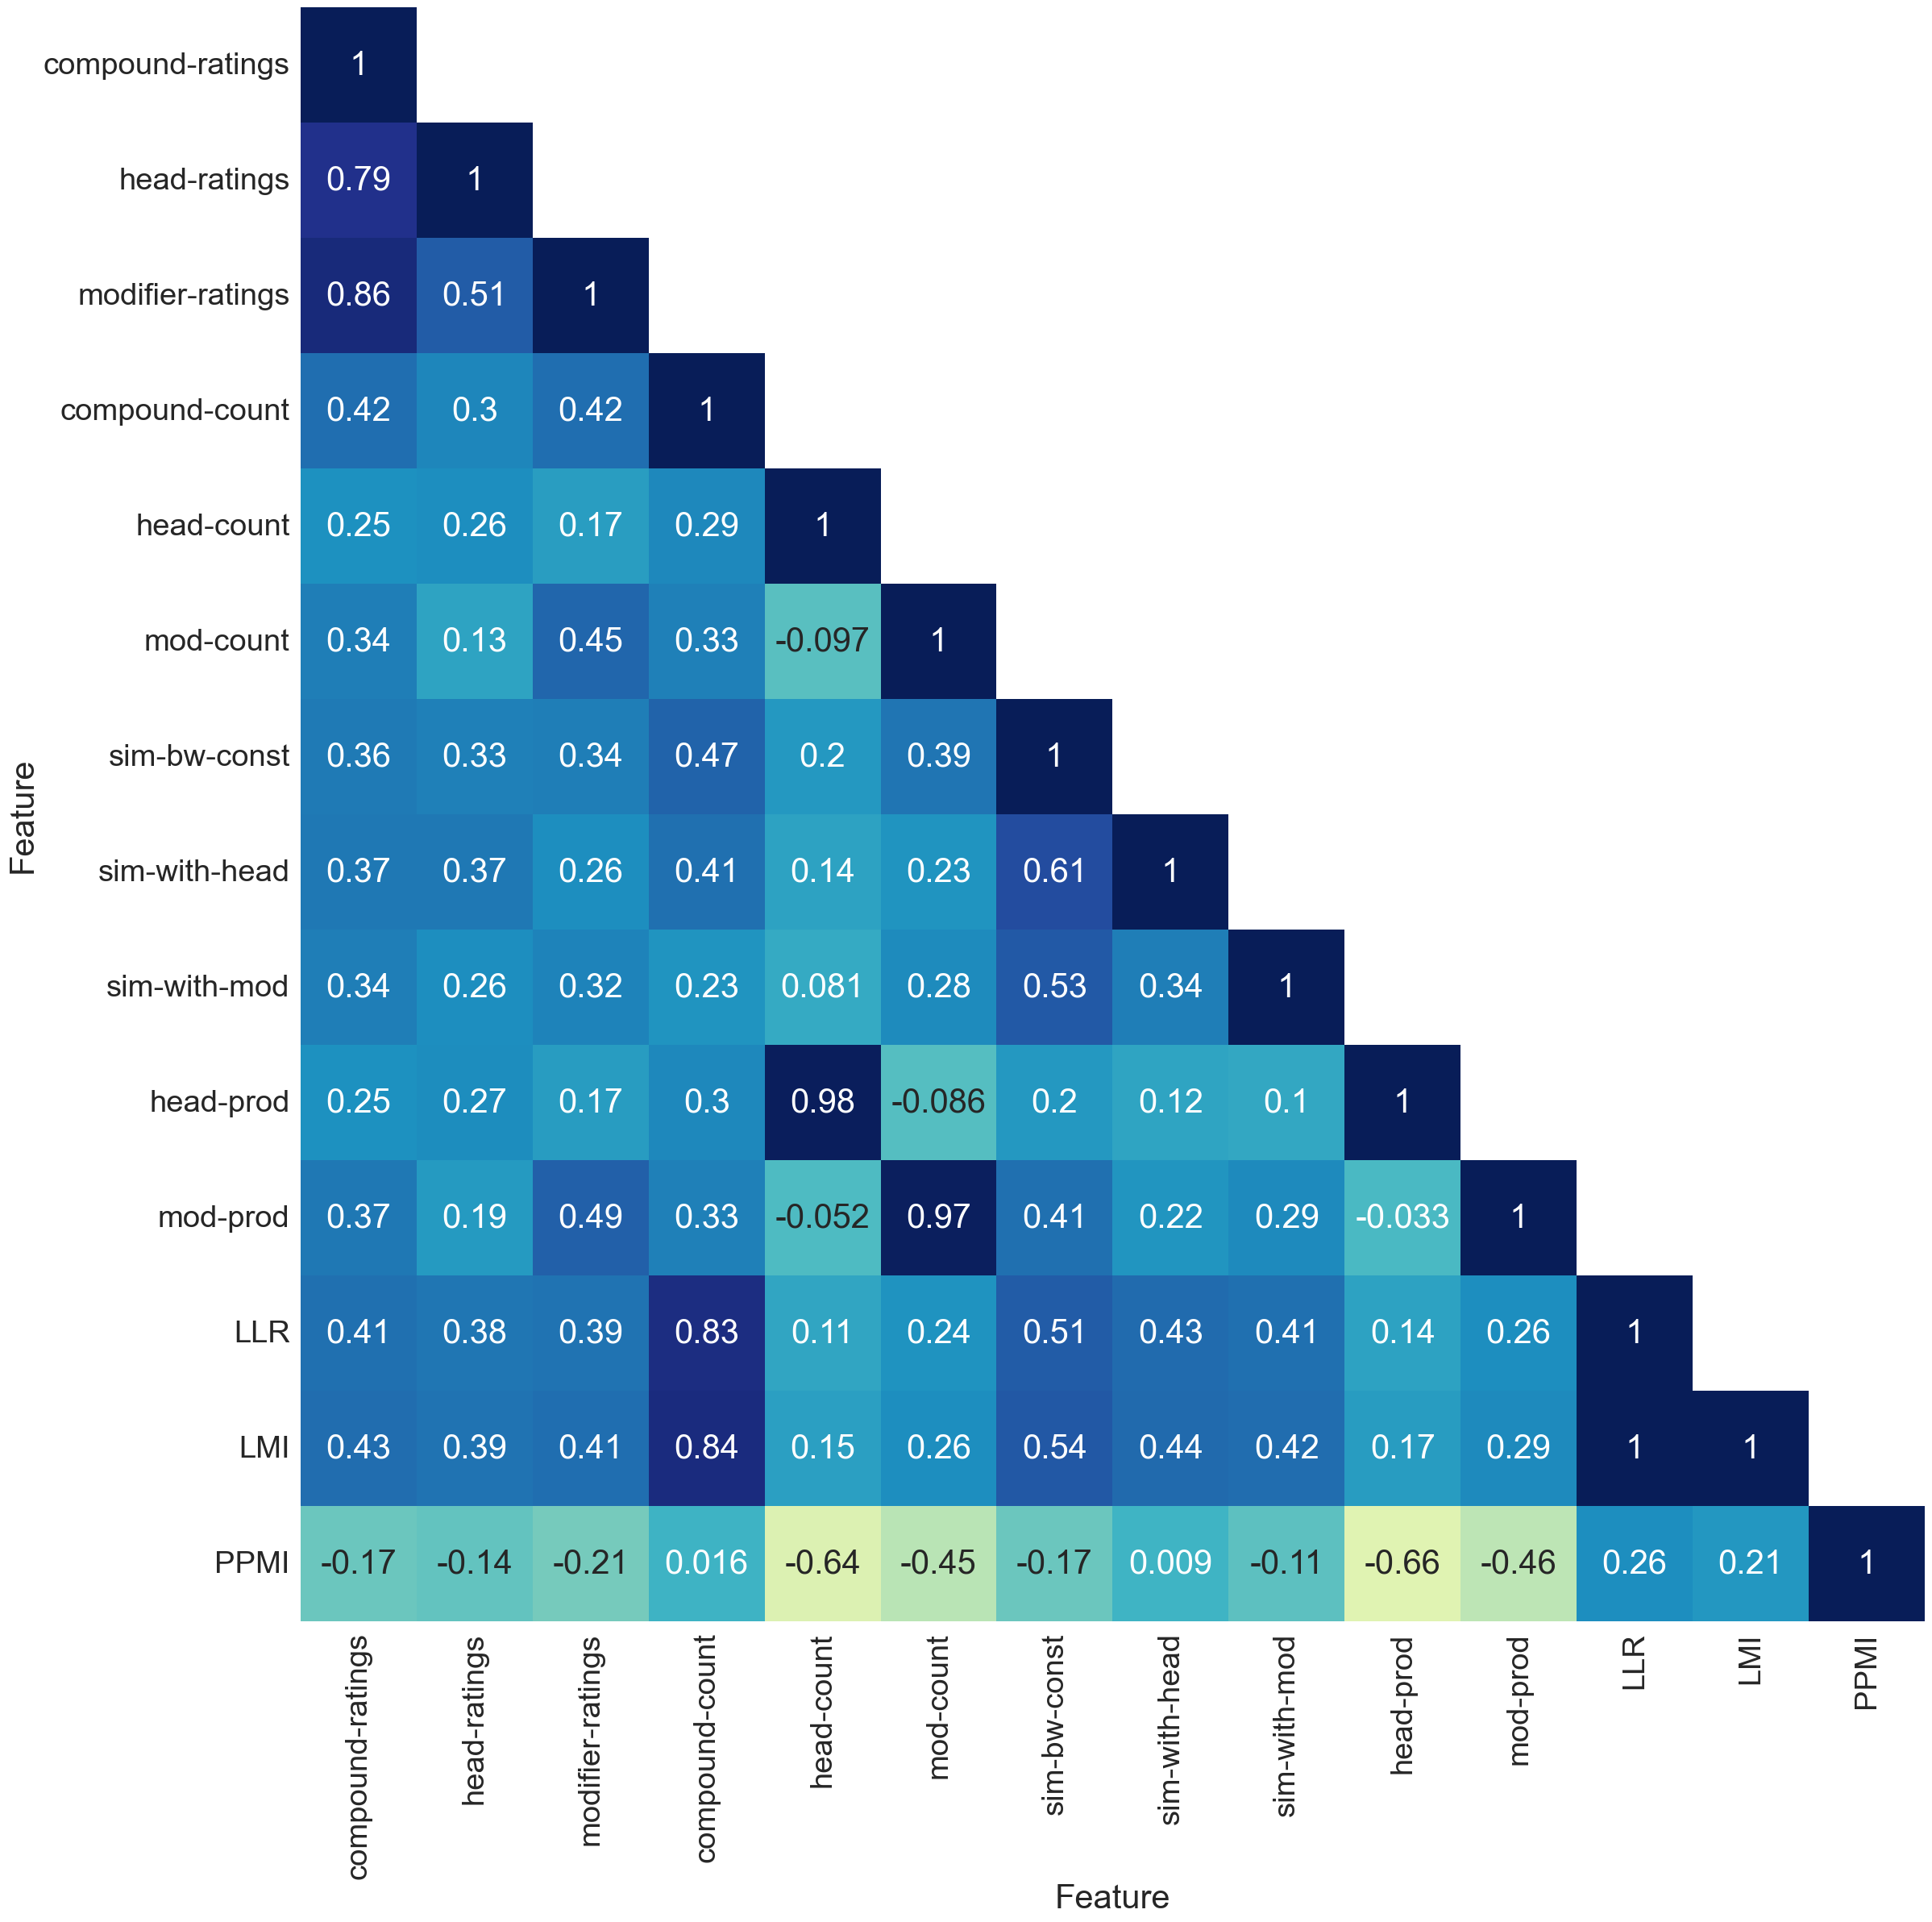

In [108]:
mask = np.zeros_like(corr_count_df.corr(method='spearman'))
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(26, 26))
g = sns.heatmap(corr_count_df.corr(method='spearman'), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", mask=mask, cbar=False)
plt.savefig(plotdir+'corr_{}_{}_{}_{}.png'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}.jpg'.format(mode, timespan, cutoff, dimension), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}.tiff'.format(mode, timespan, cutoff, dimension), dpi=300)
if use_pgf:
    plt.savefig(plotdir+'corr_{}_{}_{}_{}.pgf'.format(mode, timespan, cutoff, dimension))

## Correlations per ratings group

### High

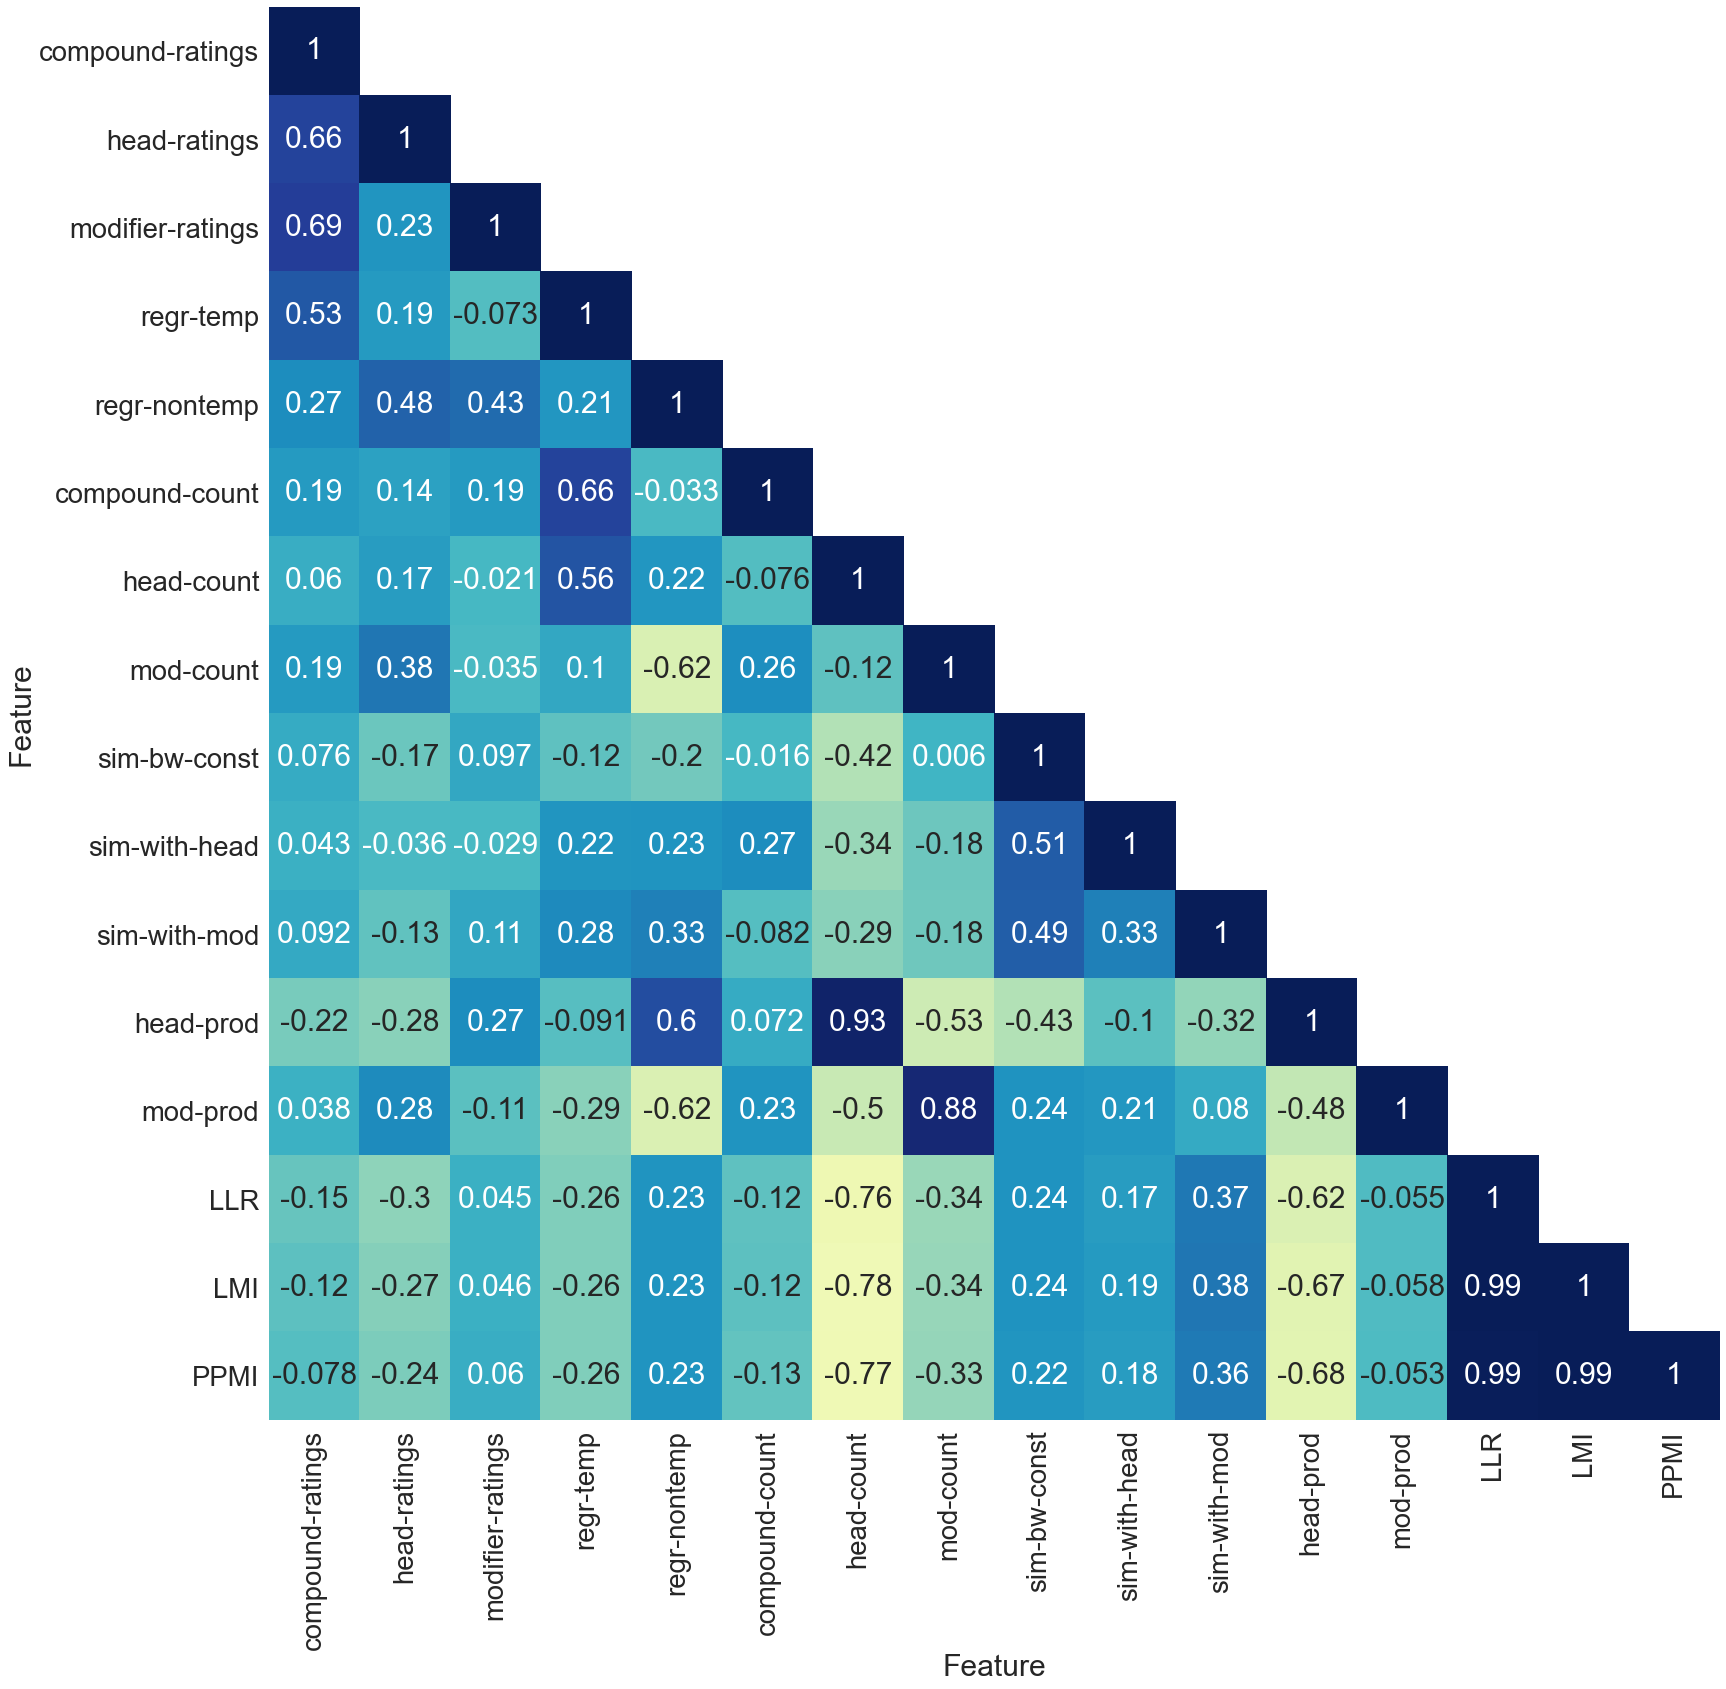

In [45]:
corr_count_df_low = corr_count_df[corr_count_df.compound_rating == "low"]
mask = np.zeros_like(corr_count_df_low.corr(method='spearman'))
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(26, 26))
g = sns.heatmap(corr_count_df_low.corr(method='spearman'), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", mask=mask, cbar=False)
plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.png'.format(mode, timespan, cutoff, dimension, "low"), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.jpg'.format(mode, timespan, cutoff, dimension, "low"), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.tiff'.format(mode, timespan, cutoff, dimension, "low"), dpi=300)
if use_pgf:
    plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.pgf'.format(mode, timespan, cutoff, dimension, "low"))

### Low

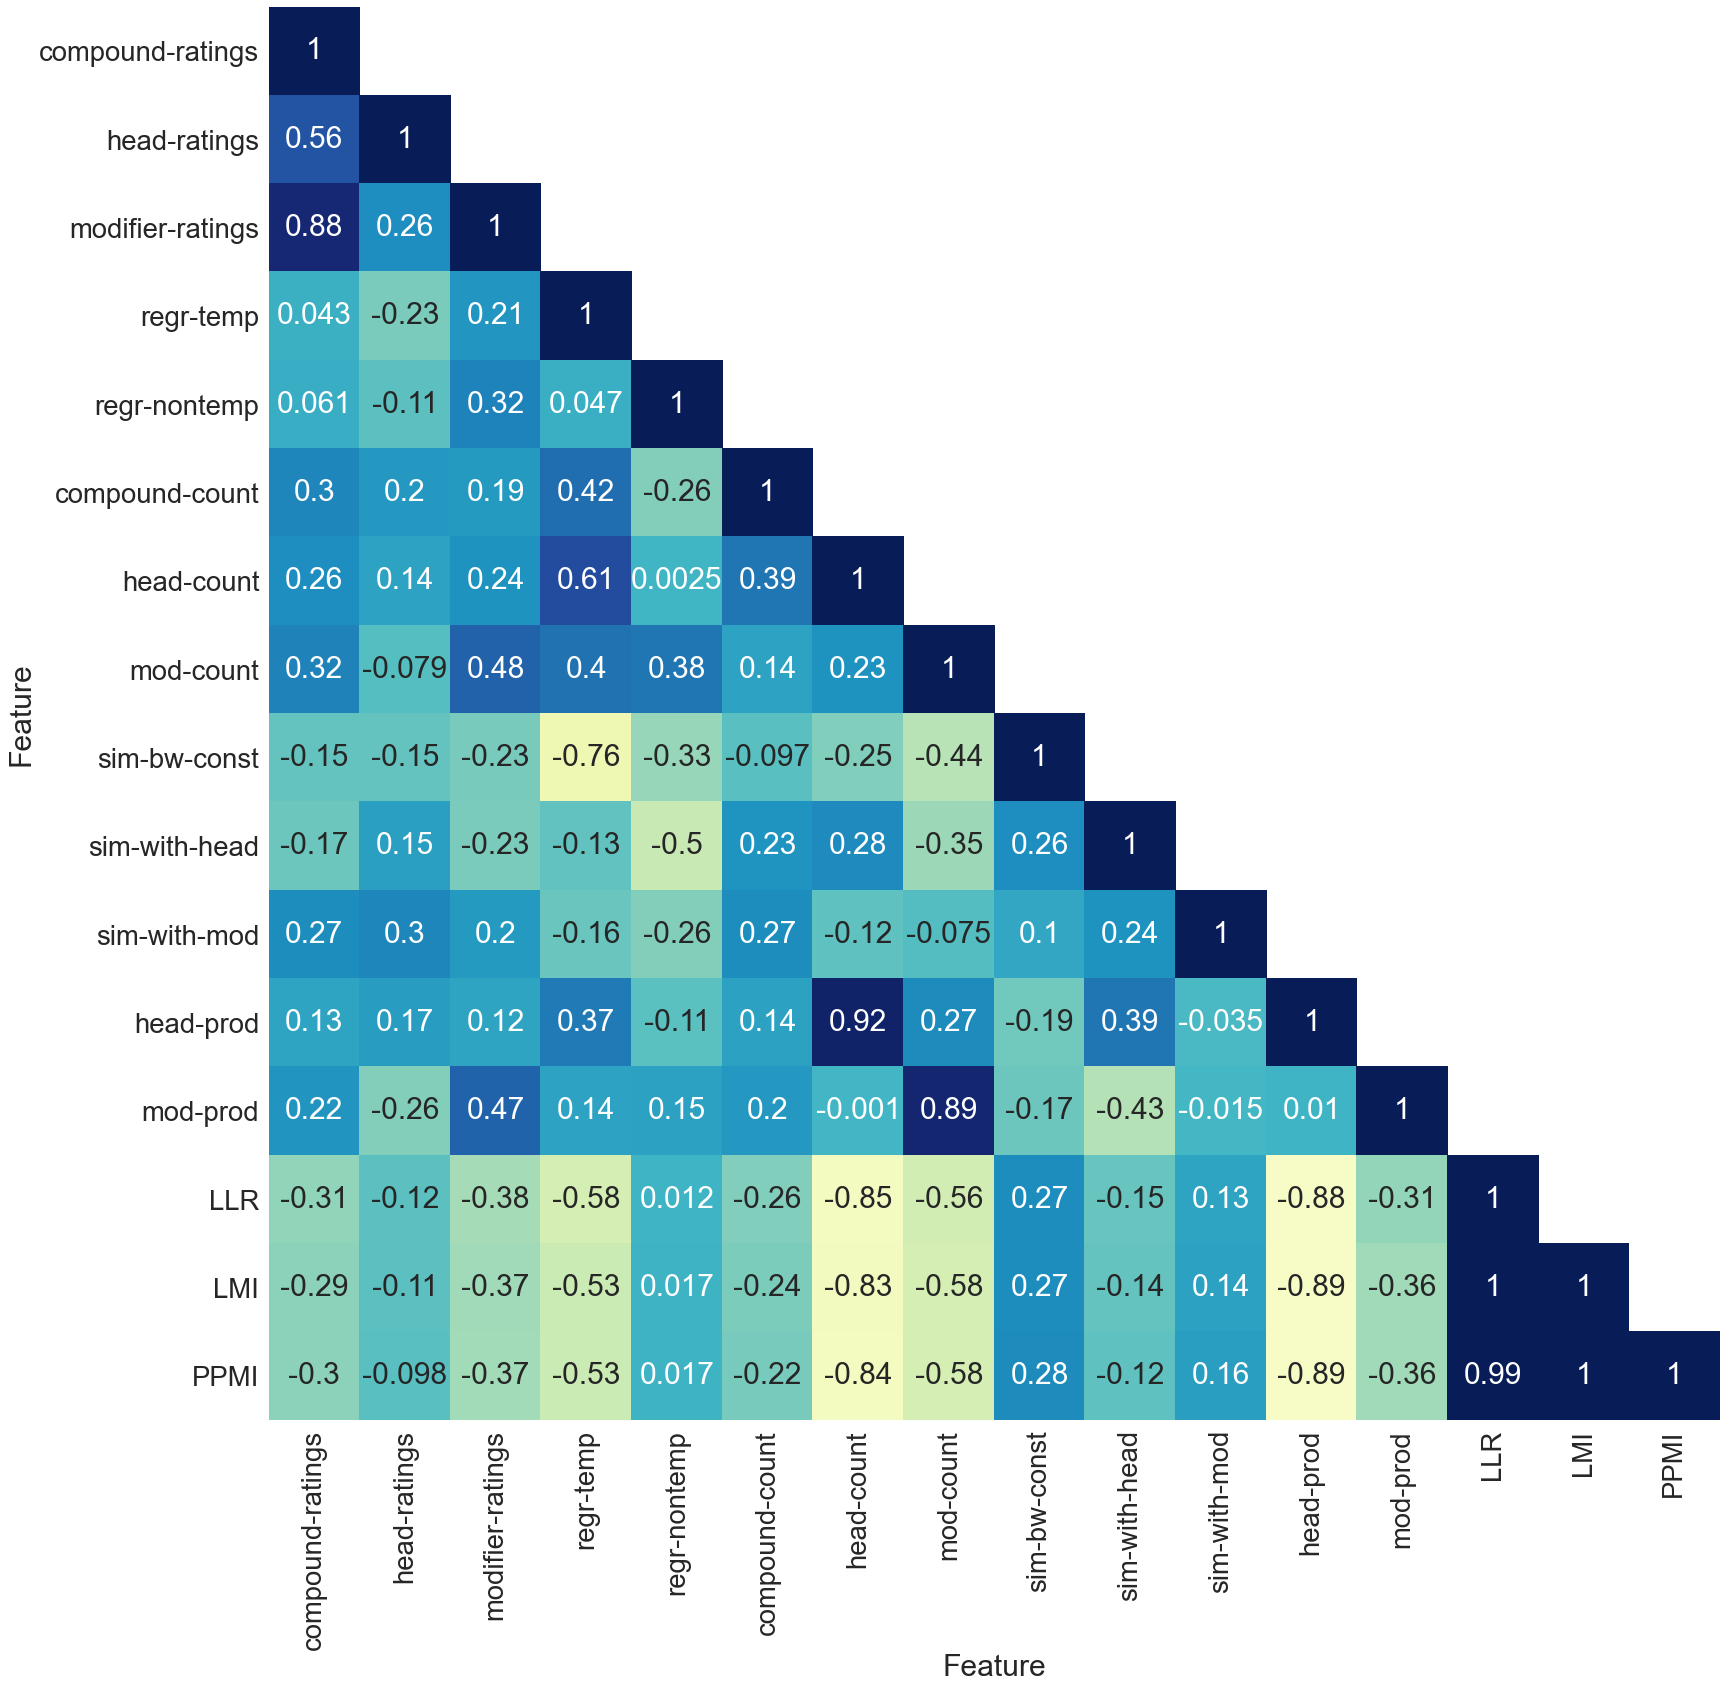

In [46]:
corr_count_df_high = corr_count_df[corr_count_df.compound_rating == "high"]
mask = np.zeros_like(corr_count_df_high.corr(method='spearman'))
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(26, 26))
g = sns.heatmap(corr_count_df_high.corr(method='spearman'), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", mask=mask, cbar=False)
plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.png'.format(mode, timespan, cutoff, dimension, "high"), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.jpg'.format(mode, timespan, cutoff, dimension, "high"), dpi=300)
plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.tiff'.format(mode, timespan, cutoff, dimension, "high"), dpi=300)
if use_pgf:
    plt.savefig(plotdir+'corr_{}_{}_{}_{}_{}.pgf'.format(mode, timespan, cutoff, dimension, "high"))

# Get statistics about compound frequency distribution per ratings group

In [47]:
compound_freq_statistics = plot_count_df.drop_duplicates()
compound_freq_statistics = compound_freq_statistics[["compound", "Compositionality Rating", "count"]].groupby(["compound", "Compositionality Rating"]).sum()
compound_freq_statistics

,,count
compound,Compositionality Rating,
academy award,high,114
acid test,low,8
balance sheet,high,58
banana republic,low,19
bank account,high,45
...,...,...
snake oil,low,19
sugar daddy,low,11
swan song,low,6


In [48]:
compound_freq_statistics.groupby(["Compositionality Rating"]).count()

,count
Compositionality Rating,
high,31
low,31


In [49]:
compound_freq_statistics.groupby(["Compositionality Rating"]).mean()

,count
Compositionality Rating,
high,59.387
low,27.645


In [50]:
compound_freq_statistics.groupby(["Compositionality Rating"]).std()

,count
Compositionality Rating,
high,50.611
low,33.012
